<a href="https://colab.research.google.com/github/cmgpcinthia/Big_Data_Machine_Learning/blob/main/8_1_Clase12N_02_linear_regression_motivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal: motivación

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4.5, 3]

## El problema

Tenemos 100 estudiantes, de los que sabemos:
 * el número de horas que estudiaron para su examen
 * la nota que obtuvieron (de 0 a 100)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/hours_vs_mark.csv")

In [ ]:
data.head()

,horas,nota
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


Nos gustaría entender la relación $$nota = f(horas)$$

de manera que podamos **predecir la nota esperada** que obtendremos estudiando un determinado número de horas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploración del data

In [ ]:
data.shape

(100, 2)

In [ ]:
data.mean()

,0
horas,428.54
nota,47.94


In [ ]:
data.max()

,0
horas,986
nota,100


In [ ]:
data.describe()

,horas,nota
count,100.000000,100.000000
mean,428.540000,47.940000
std,285.241752,27.757907
min,2.000000,0.000000
25%,167.250000,29.500000
50%,424.500000,44.000000
75%,662.500000,68.000000
max,986.000000,100.000000


In [ ]:
data.head()

,horas,nota
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


<Axes: xlabel='nota', ylabel='Count'>

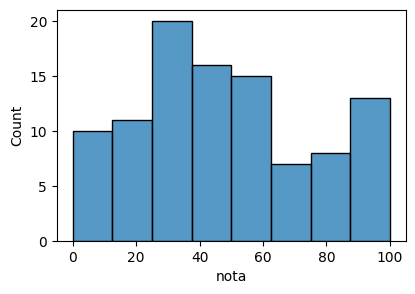

In [ ]:
sns.histplot(x=data.nota)

<Axes: xlabel='horas', ylabel='Count'>

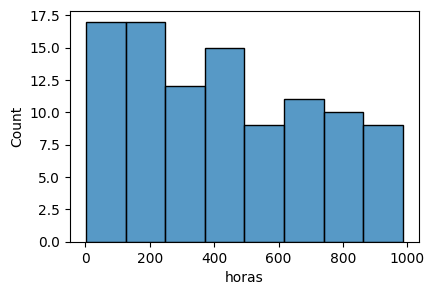

In [ ]:
sns.histplot(x=data.horas)

<Axes: xlabel='horas', ylabel='Density'>

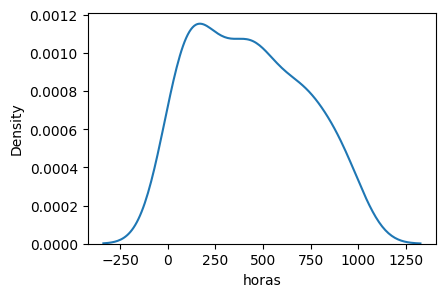

In [ ]:
sns.kdeplot(x=data.horas)

<Axes: xlabel='horas', ylabel='nota'>

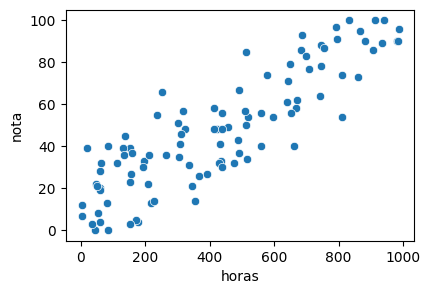

In [ ]:
sns.scatterplot(x=data.horas, y=data.nota)

In [ ]:
data.corr()

,horas,nota
horas,1.000000,0.867072
nota,0.867072,1.000000


## El modelo lineal

Probemos con una relación lineal, $$Y = m * X + n$$

$m$ es la pendiente  
$n$ es el valor de $Y$ cuando $X=0$

$$nota = m * horas + n$$

Queremos encontrar los valores de $m$ and $n$ que *mejor* modelan nuestros datos

Conjeturemos:

$$nota = $$

$$nota_2 =  $$

Qué modelo lo hace mejor?

In [ ]:
data.shape

(100, 2)

In [ ]:
data.head()

,horas,nota
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [ ]:
data["prediction_1"] = data.horas * 0.1

In [ ]:
data["prediction_2"] = data.horas * 0.11 + 5

In [ ]:
# semi-random prediction
data["prediction_3"] = np.random.uniform(40, 60, size=data.shape[0]).round(2)

In [ ]:
data.head(10)

,horas,nota,prediction_1,prediction_2,prediction_3
0,865,95,86.5,100.15,44.87
1,4,12,0.4,5.44,41.52
2,305,35,30.5,38.55,56.72
3,437,56,43.7,53.07,43.70
4,682,86,68.2,80.02,54.63
5,560,40,56.0,66.60,51.19
6,367,26,36.7,45.37,57.24
7,861,73,86.1,99.71,45.55
8,59,20,5.9,11.49,56.14
9,514,85,51.4,61.54,47.29


Qué hace a un modelo "mejor"?

Veamos cuál es el error de cada modelo

Utilizaremos el [error cuadrático medio](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio)

In [ ]:
data['error_1'] = (data.nota - data.prediction_1) ** 2

In [ ]:
data['error_2'] = (data.nota - data.prediction_2) ** 2

In [ ]:
data['error_3'] = (data.nota - data.prediction_3) ** 2

In [ ]:
data.head(10)

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,100.15,44.87,72.25,26.5225,2513.0169
1,4,12,0.4,5.44,41.52,134.56,43.0336,871.4304
2,305,35,30.5,38.55,56.72,20.25,12.6025,471.7584
3,437,56,43.7,53.07,43.70,151.29,8.5849,151.2900
4,682,86,68.2,80.02,54.63,316.84,35.7604,984.0769
5,560,40,56.0,66.60,51.19,256.00,707.5600,125.2161
6,367,26,36.7,45.37,57.24,114.49,375.1969,975.9376
7,861,73,86.1,99.71,45.55,171.61,713.4241,753.5025
8,59,20,5.9,11.49,56.14,198.81,72.4201,1306.0996
9,514,85,51.4,61.54,47.29,1128.96,550.3716,1422.0441


In [ ]:
data.sample(10)

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
36,421,48,42.1,51.31,43.10,34.81,10.9561,24.0100
82,159,37,15.9,22.49,40.59,445.21,210.5401,12.8881
97,792,97,79.2,92.12,41.17,316.84,23.8144,3116.9889
24,60,28,6.0,11.60,50.02,484.00,268.9600,484.8804
3,437,56,43.7,53.07,43.70,151.29,8.5849,151.2900
5,560,40,56.0,66.60,51.19,256.00,707.5600,125.2161
37,85,40,8.5,14.35,55.75,992.25,657.9225,248.0625
54,170,5,17.0,23.70,53.40,144.00,349.6900,2342.5600
51,176,4,17.6,24.36,53.86,184.96,414.5296,2486.0196
26,152,23,15.2,21.72,56.42,60.84,1.6384,1116.8964


In [ ]:
data.error_1.mean().round(1)

np.float64(234.8)

In [ ]:
data.error_2.mean().round(1)

np.float64(259.8)

In [ ]:
data.error_3.mean().round(1)

np.float64(868.9)

Dibujemos las rectas de nuestros modelos

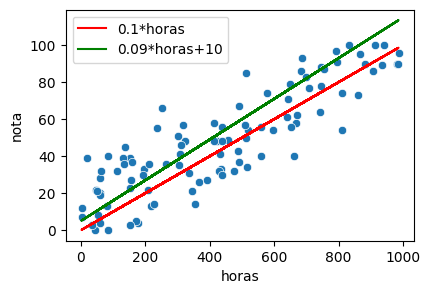

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x=data.horas, y=data.nota)

plt.plot(data.horas, data.prediction_1, color='r', label='0.1*horas')
plt.plot(data.horas, data.prediction_2, color='g', label='0.09*horas+10')

plt.legend()

In [ ]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,100.15,44.87,72.25,26.5225,2513.0169
1,4,12,0.4,5.44,41.52,134.56,43.0336,871.4304
2,305,35,30.5,38.55,56.72,20.25,12.6025,471.7584
3,437,56,43.7,53.07,43.70,151.29,8.5849,151.2900
4,682,86,68.2,80.02,54.63,316.84,35.7604,984.0769


### Entendiendo el error del modelo como una función de `m` y `n`

$$nota = m * horas + n$$

`L` significa Loss (la palabra que se utiliza como "error" en Data Science)

$$Error = L(m, n)$$

$$nota =$$

$$L(m=, n=) = $$

$$nota_2 =$$

$$L(m=, n=) = $$

Si llamamos:
 - $y_i$ a la nota real del estudiante $i$
 - $\hat{y_i}$ la nota predicha para el estudiante $i$  

El error es $$L(m, n) = \frac{1}{N} \sum (y_i - \hat{y_i})^2 = \frac{1}{N} \sum (y_i - (m * x_i + n))^2 $$

y siendo cuadrática en `m` y `n`, la función `L` tiene un mínimo global

## El modelo lineal óptimo

Podemos encontrar **el mejor** modelo lineal?

`scikit-learn` es una librería de Python para entrenar modelos

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr

LinearRegression()

In [ ]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [ ]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,100.15,44.87,72.25,26.5225,2513.0169
1,4,12,0.4,5.44,41.52,134.56,43.0336,871.4304
2,305,35,30.5,38.55,56.72,20.25,12.6025,471.7584
3,437,56,43.7,53.07,43.70,151.29,8.5849,151.2900
4,682,86,68.2,80.02,54.63,316.84,35.7604,984.0769


In [ ]:
# train the model
# X predictors: 1 or more columns
# y target: 1 column
lr.fit(
    # X = data[["horas", "edad", "horasdesueño"]],
    X = data[["horas"]],
    y = data.nota,
)

LinearRegression()

$$nota = m * horas + n$$

In [ ]:
# access coefficients m and n. it has 1 entry per predictor variable
lr.coef_

array([0.08437787])

Si tuviéramos 3 predictores en vez de uno, la función sería algo así:
$$nota = m_1 * horas + m_2 * edad + m_3 * horasdesueño + n$$

In [ ]:
optimal_m = lr.coef_[0]

In [ ]:
optimal_m

np.float64(0.08437787096170372)

In [ ]:
optimal_n = lr.intercept_

In [ ]:
optimal_n

np.float64(11.78070717807148)

$$nota = 0.084 * horas + 11.8$$

In [ ]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,100.15,44.87,72.25,26.5225,2513.0169
1,4,12,0.4,5.44,41.52,134.56,43.0336,871.4304
2,305,35,30.5,38.55,56.72,20.25,12.6025,471.7584
3,437,56,43.7,53.07,43.70,151.29,8.5849,151.2900
4,682,86,68.2,80.02,54.63,316.84,35.7604,984.0769


In [ ]:
data["best_prediction"] = (data.horas * optimal_m + optimal_n).round(2)

In [ ]:
data["best_prediction_error"] = (data.best_prediction - data.nota) ** 2

In [ ]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,best_prediction,best_prediction_error
0,865,95,86.5,100.15,44.87,72.25,26.5225,2513.0169,84.77,104.6529
1,4,12,0.4,5.44,41.52,134.56,43.0336,871.4304,12.12,0.0144
2,305,35,30.5,38.55,56.72,20.25,12.6025,471.7584,37.52,6.3504
3,437,56,43.7,53.07,43.70,151.29,8.5849,151.2900,48.65,54.0225
4,682,86,68.2,80.02,54.63,316.84,35.7604,984.0769,69.33,277.8889


In [ ]:
data.best_prediction_error.mean()

np.float64(189.308348)

In [ ]:
data.error_2.mean()

np.float64(259.831096)

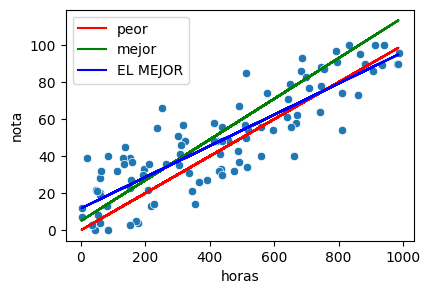

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x=data.horas, y=data.nota)

plt.plot(data.horas, data.prediction_1, color='r', label='peor')
plt.plot(data.horas, data.prediction_2, color='g', label='mejor')
plt.plot(data.horas, data.best_prediction, color='blue', label='EL MEJOR')

plt.legend()

Utilizando nuestro modelo para hacer predicciones

In [ ]:
n_horas = 1000

$$nota = 0.0844*horas + 11.78$$

In [ ]:
optimal_m * n_horas + optimal_n

np.float64(96.1585781397752)

In [ ]:
lr.predict(np.array([[750], [200], [350]])).round(2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75.06, 28.66, 41.31])

## No todo es lineal

In [ ]:
dff = pd.DataFrame({"age": [20, 30, 40, 50, 60, 70, 80], "prob_acc": np.array([1, 0.7, 0.5, 0.4, 0.5, 0.7, 1]) - 0.3})

(0.0, 1.0)

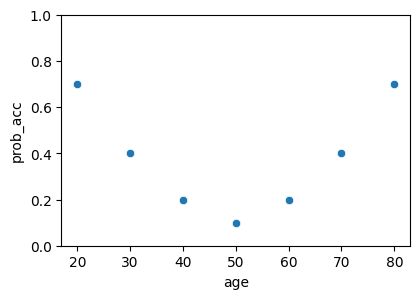

In [ ]:
g = sns.scatterplot(x=dff.age, y=dff.prob_acc)
g.set_ylim(0, 1)

$p_{acc} \sim age²$

In [ ]:
dff["age2"] = dff.age ** 2

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(
    X=dff[["age", "age2"]],
    y=dff.prob_acc
)

LinearRegression()

In [ ]:
lr.predict(np.array([[20, 400], [25, 625], [40, 1600], [50, 2500], [60, 3600], [70, 4900], [80, 6400]])).round(2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.71, 0.53, 0.19, 0.13, 0.19, 0.39, 0.71])

In [ ]:
dff.head()

,age,prob_acc,age2
0,20,0.7,400
1,30,0.4,900
2,40,0.2,1600
3,50,0.1,2500
4,60,0.2,3600


## Alinea tu métrica apropiadamente con el caso de uso

Una métrica mide numéricamente qué tal lo hace un modelo predictivo

Permite comparar dos modelos predictivos

**Motivación**: Somos una empresa que vende tupper de comida preparada cada semana

Tenemos que predecir el número de cajas de comida a preparar cada semana, y esperar que cuadre con la demanda

In [ ]:
data2 = pd.DataFrame({
    "boxes": [100, 150, 160, 90, 220],
    "pred_kpmg": [105, 153, 172, 93, 244],
    "pred_accenture": [98, 146, 166, 88, 214]
})

In [ ]:
data2

,boxes,pred_kpmg,pred_accenture
0,100,105,98
1,150,153,146
2,160,172,166
3,90,93,88
4,220,244,214


Qué modelo funciona mejor?

In [ ]:
data2["mse_kpmg"] = (data2["boxes"] - data2["pred_kpmg"]) ** 2
data2["mse_accenture"] = (data2["boxes"] - data2["pred_accenture"]) ** 2

In [ ]:
data2.head()

,boxes,pred_kpmg,pred_accenture,mse_kpmg,mse_accenture
0,100,105,98,25,4
1,150,153,146,9,16
2,160,172,166,144,36
3,90,93,88,9,4
4,220,244,214,576,36


In [ ]:
data2.mse_kpmg.mean()

np.float64(152.6)

In [ ]:
data2.mse_accenture.mean()

np.float64(19.2)

Según el criterio (la métrica) del error cuadrático medio (MSE), el modelo de Accenture funciona mejor

**pero**:
 - si hubiéramos obedecido a ese modelo, 4 veces de 5 dejamos a clientes sin servir. Faltarían cajas de comida.
 - si hubiéramos obedecido al otro modelo (KPMG), nunca dejaríamos clientes sin servir. Sobrarían cajas de comida.

Hemos de construir métricas customizadas:

In [ ]:
30 + 30 * 0.95 + 30 * 0.95 * 0.95

85.575

$30 (1 + 0.95 + 0.95² + ...) = \frac{30}{1-0.95} = 600$

Si a alguien no le sirvo caja, se va a ir un 30% de las veces

In [ ]:
600 * 0.3

180.0

In [ ]:
error_sobra = 3
error_falta = 180

In [ ]:
data2.rename(columns={"pred_kpmg": "pred_1", "pred_accenture": "pred_2"}, inplace=True)

In [ ]:
data2["error_sobra_1"] = (data2["pred_1"] - data2["boxes"]) * (data2["pred_1"] - data2["boxes"] > 0) * error_sobra

In [ ]:
data2["error_falta_1"] = (- data2["pred_1"] + data2["boxes"]) * (data2["pred_1"] - data2["boxes"] < 0) * error_falta

In [ ]:
data2["error_sobra_2"] = (data2["pred_2"] - data2["boxes"]) * (data2["pred_2"] - data2["boxes"] > 0) * error_sobra

In [ ]:
data2["error_falta_2"] = (- data2["pred_2"] + data2["boxes"]) * (data2["pred_2"] - data2["boxes"] < 0) * error_falta

In [ ]:
data2["loss_1"] = data2.error_sobra_1 + data2.error_falta_1
data2["loss_2"] = data2.error_sobra_2 + data2.error_falta_2

In [ ]:
del data2["mse_kpmg"]
del data2["mse_accenture"]

In [ ]:
data2

,boxes,pred_1,pred_2,error_sobra_1,error_falta_1,error_sobra_2,error_falta_2,loss_1,loss_2
0,100,105,98,15,0,0,360,15,360
1,150,153,146,9,0,0,720,9,720
2,160,172,166,36,0,18,0,36,18
3,90,93,88,9,0,0,360,9,360
4,220,244,214,72,0,0,1080,72,1080


In [ ]:
data2.loss_1.sum()

np.int64(141)

In [ ]:
data2.loss_2.sum()

np.int64(2538)

Y, con esta **métrica alineada con el negocio**, el modelo 1 es mejor